# CIFAR10 CNN Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow 2.x.

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


####[CCC-01]
Import modules and set a random seed.

In [2]:
import os, random
os.environ['PYTHONHASHSEED'] = str(20230515)
os.environ['TF_USE_LEGACY_KERAS'] = '1'
random.seed(20230515)

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(20190610)
tf.random.set_seed(20190610)

####[CCC-02]
Download the CIFAR10 dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 19s 0us/step


####[CCC-03]
Show sample images for each category.

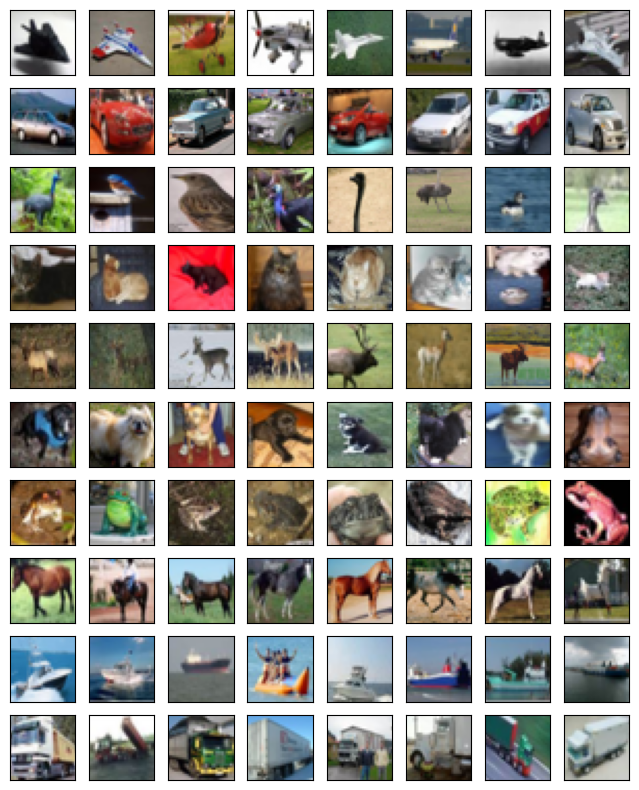

In [4]:
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            c += 1
            subplot = fig.add_subplot(10, 8, c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(train_images[j])
            if c % 8 == 0:
                break

####[CCC-04]
Define the image data generator.

In [5]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

####[CCC-05]
Show some generated images for each category.

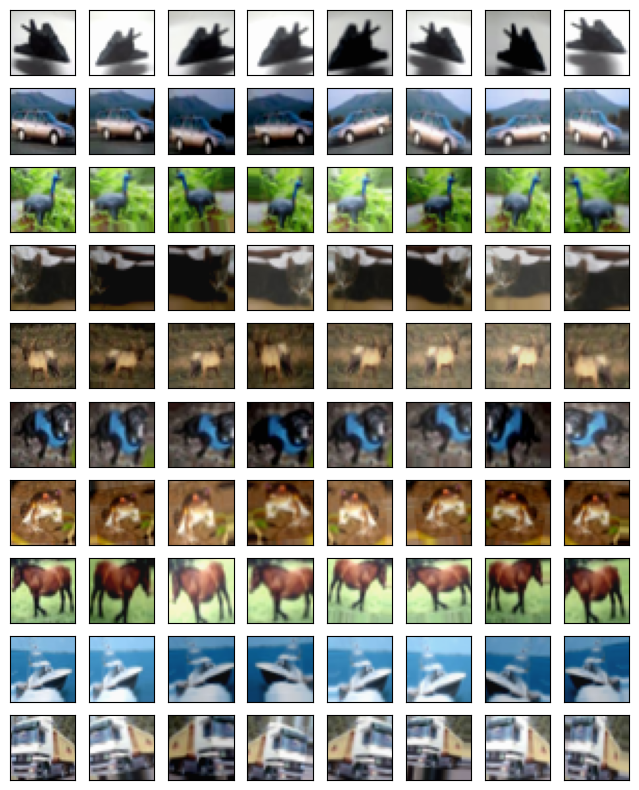

In [6]:
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            break
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(train_images[j])

    for _ in range(7):
        img = datagen.flow(np.array([train_images[j]]), batch_size=1)[0][0]
        c += 1
        subplot = fig.add_subplot(10, 8, c)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(img)

####[CCC-06]
Define a CNN model.

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        input_shape=(32, 32, 3),
                        name='conv_filter1-1'))
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Dropout(rate=0.25, name='dropout1'))

model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Dropout(rate=0.25, name='dropout2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_filter1-1 (Conv2D)     (None, 32, 32, 32)        896       
                                                                 
 conv_filter1-2 (Conv2D)     (None, 32, 32, 32)        9248      
                                                                 
 max_pooling1 (MaxPooling2D  (None, 16, 16, 32)        0         
 )                                                               
                                                                 
 dropout1 (Dropout)          (None, 16, 16, 32)        0         
                                                                 
 conv_filter2-1 (Conv2D)     (None, 16, 16, 64)        18496     
                                                                 
 conv_filter2-2 (Conv2D)     (None, 16, 16, 64)        36928     
                                                        

####[CCC-07]
Compile the model using the Adam optimizer, and the cross entroy as a loss function.

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[CCC-08]
Train the model. It achieves around 75% accuracy.

In [9]:
batch_size = 64
history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=20)

Epoch 1/20


<ipython-input-9-34373bc29d0a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


781/781 [==============================] - 48s 53ms/step - loss: 1.7535 - acc: 0.3559 - val_loss: 1.3001 - val_acc: 0.5281
Epoch 2/20
781/781 [==============================] - 39s 50ms/step - loss: 1.3999 - acc: 0.4961 - val_loss: 1.1857 - val_acc: 0.5704
Epoch 3/20
781/781 [==============================] - 39s 50ms/step - loss: 1.2595 - acc: 0.5501 - val_loss: 0.9892 - val_acc: 0.6495
Epoch 4/20
781/781 [==============================] - 39s 50ms/step - loss: 1.1673 - acc: 0.5854 - val_loss: 1.0637 - val_acc: 0.6232
Epoch 5/20
781/781 [==============================] - 40s 51ms/step - loss: 1.0999 - acc: 0.6096 - val_loss: 0.8840 - val_acc: 0.6947
Epoch 6/20
781/781 [==============================] - 39s 50ms/step - loss: 1.0422 - acc: 0.6325 - val_loss: 0.9192 - val_acc: 0.6842
Epoch 7/20
781/781 [==============================] - 39s 50ms/step - loss: 1.0006 - acc: 0.6484 - val_loss: 0.8142 - val_acc: 0.7209
Epoch 8/20
781/781 [==============================] - 40s 52ms/step - los

####[CCC-09]
Plot chars for accuracy and loss values.

<Axes: >

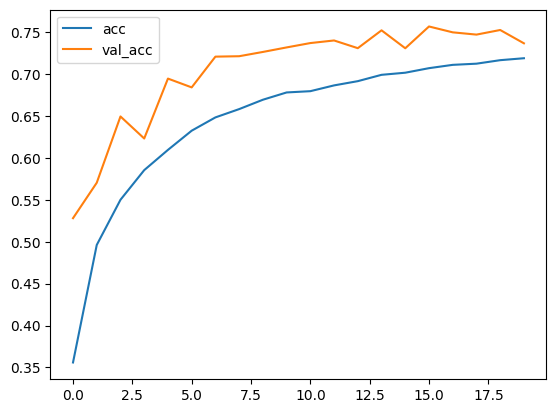

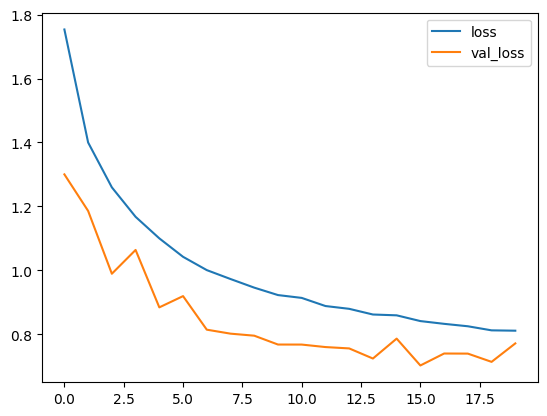

In [10]:
DataFrame({'acc': history.history['acc'],
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'],
           'val_loss': history.history['val_loss']}).plot()